# Individual Assignment

Import all the relevant packages

In [174]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import minimize

### 1. Data Retrieval
In this step, I chose 10 actively traded firms and use yfinance to pull data from Yahoo Finance for 2020-2024.

In [175]:
Tickers = ['ADBE', 'JNJ', 'V', 'GOOGL', 'AMZN', 'MSFT', 'PG', 'SCHW', 'CVX', 'JPM']
data = yf.download(Tickers, start="2020-01-01", end="2024-12-31")
# save the data to a CSV file in order to reproduce the results
data.to_csv("stock_data.csv")
data

/tmp/ipykernel_29146/120195850.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(Tickers, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  10 of 10 completed


Price            Close                                                  \
Ticker            ADBE        AMZN         CVX       GOOGL         JNJ   
Date                                                                     
2020-01-02  334.429993   94.900497   95.001541   68.026024  124.983727   
2020-01-03  331.809998   93.748497   94.672966   67.670158  123.536690   
2020-01-06  333.709991   95.143997   94.352203   69.473846  123.382538   
2020-01-07  333.390015   95.343002   93.147362   69.339645  124.135994   
2020-01-08  337.869995   94.598503   92.083359   69.833191  124.118904   
...                ...         ...         ...         ...         ...   
2024-12-23  446.739990  225.059998  139.700027  194.171036  142.891403   
2024-12-24  447.940002  229.050003  140.550125  195.647552  143.461914   
2024-12-26  450.160004  227.050003  140.686935  195.138748  143.196320   
2024-12-27  446.480011  223.750000  140.706467  192.305435  142.675018   
2024-12-30  445.799988  221.300003  139.797745  190.789047  140.992996   

Price                                                                  ...  \
Ticker             JPM        MSFT          PG       SCHW           V  ...   
Date                                                                   ...   
2020-01-02  120.733559  153.042252  107.748253  44.621315  183.872055  ...   
2020-01-03  119.140297  151.136658  107.023598  43.492596  182.409698  ...   
2020-01-06  119.045570  151.527298  107.171989  43.797901  182.015259  ...   
2020-01-07  117.021706  150.145706  106.508461  44.056950  181.534210  ...   
2020-01-08  117.934639  152.537308  106.962463  44.325256  184.641678  ...   
...                ...         ...         ...        ...         ...  ...   
2024-12-23  235.713242  433.583038  166.056030  74.224411  316.162048  ...   
2024-12-24  239.589218  437.647369  166.875900  74.353569  319.580597  ...   
2024-12-26  240.409912  436.432068  168.080994  74.562202  319.839752  ...   
2024-12-27  238.462036  428.881104  167.458694  74.254219  317.597229  ...   
2024-12-30  236.632812  423.202911  165.048492  73.449478  314.258423  ...   

Price        Volume                                                            \
Ticker         ADBE      AMZN      CVX     GOOGL      JNJ       JPM      MSFT   
Date                                                                            
2020-01-02  1990100  80580000  5205000  27278000  5777000  10803700  22622100   
2020-01-03  1577600  75288000  6360900  23408000  5752400  10386800  21116200   
2020-01-06  1874700  81236000  9953000  46768000  7731300  10259000  20813700   
2020-01-07  2500800  80898000  7856900  34330000  7382900  10531300  21634100   
2020-01-08  2248500  70160000  7295900  35314000  6605800   9695300  27746500   
...             ...       ...      ...       ...      ...       ...       ...   
2024-12-23  3781200  28070000  8156500  25675000  8720800   8611500  19152500   
2024-12-24  1685000  15007500  3556100  10403300  3164100   3729100   7164500   
2024-12-26  2131200  16146700  4492600  12046600  4656300   4451800   8194200   
2024-12-27  2947200  27367100  5296500  18891400  5588300   5730200  18117700   
2024-12-30  3473200  28321200  6194800  14264700  6268700   5723800  13158700   

Price                                    
Ticker           PG      SCHW         V  
Date                                     
2020-01-02  8130800   5644800   8733000  
2020-01-03  7970500   6698900   4899700  
2020-01-06  6674400   6804300  10109500  
2020-01-07  7583400   9985100   4392300  
2020-01-08  5385100  10887000   5712000  
...             ...       ...       ...  
2024-12-23  6983900   6863600   7984600  
2024-12-24  2460800   2150300   2684100  
2024-12-26  3629400   2926900   2856000  
2024-12-27  4367900   3967500   3489200  
2024-12-30  4354500   5321700   3478500  

[1257 rows x 50 columns]

We load data again and clean data to ensure it is.

In [176]:
data = pd.read_csv("stock_data.csv", header=[0,1], index_col=0, parse_dates=True)
# Check for missing values in the dataset
print(data.isnull().sum().sum())
# Check for duplicate rows in the dataset
print(data.duplicated().sum())
data

0
0


Price            Close                                                  \
Ticker            ADBE        AMZN         CVX       GOOGL         JNJ   
Date                                                                     
2020-01-02  334.429993   94.900497   95.001541   68.026024  124.983727   
2020-01-03  331.809998   93.748497   94.672966   67.670158  123.536690   
2020-01-06  333.709991   95.143997   94.352203   69.473846  123.382538   
2020-01-07  333.390015   95.343002   93.147362   69.339645  124.135994   
2020-01-08  337.869995   94.598503   92.083359   69.833191  124.118904   
...                ...         ...         ...         ...         ...   
2024-12-23  446.739990  225.059998  139.700027  194.171036  142.891403   
2024-12-24  447.940002  229.050003  140.550125  195.647552  143.461914   
2024-12-26  450.160004  227.050003  140.686935  195.138748  143.196320   
2024-12-27  446.480011  223.750000  140.706467  192.305435  142.675018   
2024-12-30  445.799988  221.300003  139.797745  190.789047  140.992996   

Price                                                                  ...  \
Ticker             JPM        MSFT          PG       SCHW           V  ...   
Date                                                                   ...   
2020-01-02  120.733559  153.042252  107.748253  44.621315  183.872055  ...   
2020-01-03  119.140297  151.136658  107.023598  43.492596  182.409698  ...   
2020-01-06  119.045570  151.527298  107.171989  43.797901  182.015259  ...   
2020-01-07  117.021706  150.145706  106.508461  44.056950  181.534210  ...   
2020-01-08  117.934639  152.537308  106.962463  44.325256  184.641678  ...   
...                ...         ...         ...        ...         ...  ...   
2024-12-23  235.713242  433.583038  166.056030  74.224411  316.162048  ...   
2024-12-24  239.589218  437.647369  166.875900  74.353569  319.580597  ...   
2024-12-26  240.409912  436.432068  168.080994  74.562202  319.839752  ...   
2024-12-27  238.462036  428.881104  167.458694  74.254219  317.597229  ...   
2024-12-30  236.632812  423.202911  165.048492  73.449478  314.258423  ...   

Price        Volume                                                            \
Ticker         ADBE      AMZN      CVX     GOOGL      JNJ       JPM      MSFT   
Date                                                                            
2020-01-02  1990100  80580000  5205000  27278000  5777000  10803700  22622100   
2020-01-03  1577600  75288000  6360900  23408000  5752400  10386800  21116200   
2020-01-06  1874700  81236000  9953000  46768000  7731300  10259000  20813700   
2020-01-07  2500800  80898000  7856900  34330000  7382900  10531300  21634100   
2020-01-08  2248500  70160000  7295900  35314000  6605800   9695300  27746500   
...             ...       ...      ...       ...      ...       ...       ...   
2024-12-23  3781200  28070000  8156500  25675000  8720800   8611500  19152500   
2024-12-24  1685000  15007500  3556100  10403300  3164100   3729100   7164500   
2024-12-26  2131200  16146700  4492600  12046600  4656300   4451800   8194200   
2024-12-27  2947200  27367100  5296500  18891400  5588300   5730200  18117700   
2024-12-30  3473200  28321200  6194800  14264700  6268700   5723800  13158700   

Price                                    
Ticker           PG      SCHW         V  
Date                                     
2020-01-02  8130800   5644800   8733000  
2020-01-03  7970500   6698900   4899700  
2020-01-06  6674400   6804300  10109500  
2020-01-07  7583400   9985100   4392300  
2020-01-08  5385100  10887000   5712000  
...             ...       ...       ...  
2024-12-23  6983900   6863600   7984600  
2024-12-24  2460800   2150300   2684100  
2024-12-26  3629400   2926900   2856000  
2024-12-27  4367900   3967500   3489200  
2024-12-30  4354500   5321700   3478500  

[1257 rows x 50 columns]

Therefore, we can confirm that the data has no missing values and duplicated values. We can further do our data exploration now.

### 2. Data Exploration
(1) Present the head and tail of a wide data frame that shows the closing prices for each stock.


In [177]:
# Extract the Close prices for each stock
close = data["Close"]
df = close.copy()

# Present the first 5 rows of each stock's Close prices
print(close.head())

# Present the last 5 rows of each stock's Close prices
print(close.tail())

Ticker            ADBE       AMZN        CVX      GOOGL         JNJ  \
Date                                                                  
2020-01-02  334.429993  94.900497  95.001541  68.026024  124.983727   
2020-01-03  331.809998  93.748497  94.672966  67.670158  123.536690   
2020-01-06  333.709991  95.143997  94.352203  69.473846  123.382538   
2020-01-07  333.390015  95.343002  93.147362  69.339645  124.135994   
2020-01-08  337.869995  94.598503  92.083359  69.833191  124.118904   

Ticker             JPM        MSFT          PG       SCHW           V  
Date                                                                   
2020-01-02  120.733559  153.042252  107.748253  44.621315  183.872055  
2020-01-03  119.140297  151.136658  107.023598  43.492596  182.409698  
2020-01-06  119.045570  151.527298  107.171989  43.797901  182.015259  
2020-01-07  117.021706  150.145706  106.508461  44.056950  181.534210  
2020-01-08  117.934639  152.537308  106.962463  44.325256  184.641678 

(2) Create a single plot showing the closing prices of all ten stocks over the five year period.

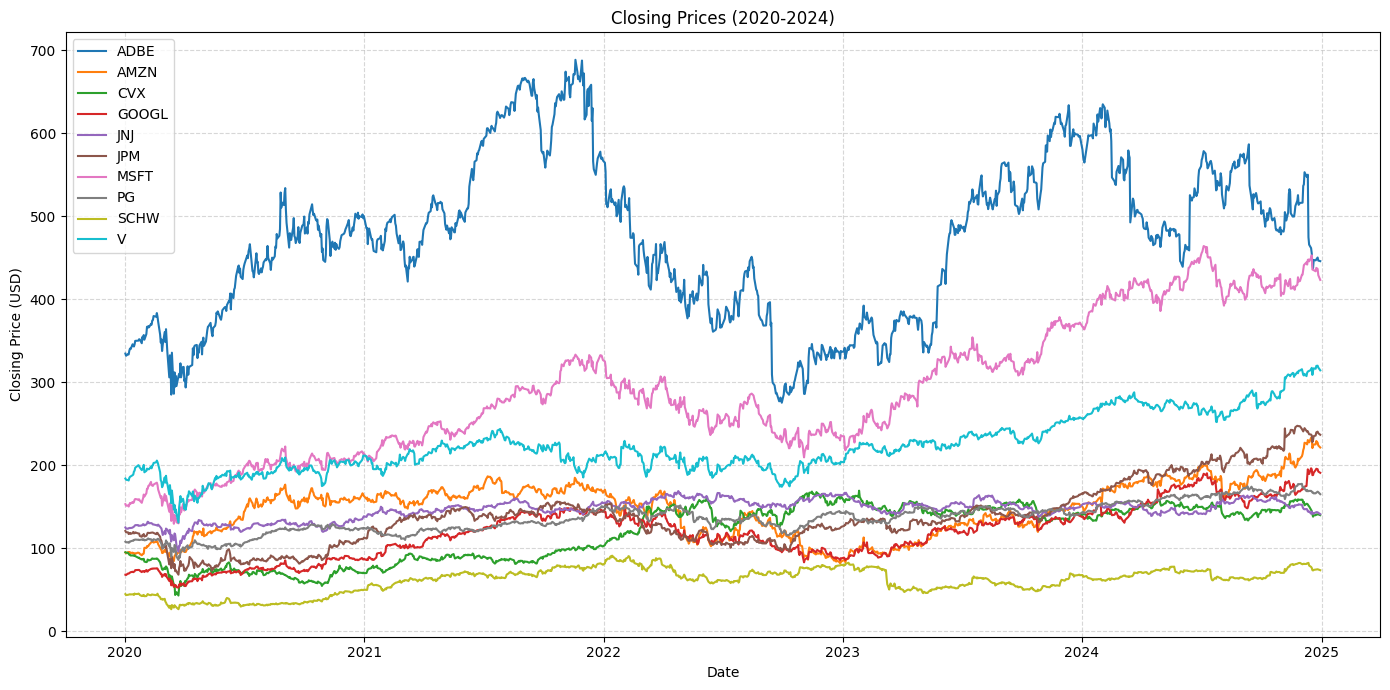

In [178]:
plt.figure(figsize=(14, 7))
for ticker in df.columns:
    plt.plot(df.index, df[ticker], label=ticker)
plt.title("Closing Prices (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 3. Backtesting
In this section, we will implement and backtest a Bollinger Bands Mean Reversion strategy for each stock.

(1) Generate signals and positions that follows the Bollinger Bands Mean Reversion Strategy.



In [179]:
def Bollinger_strategy(dfi, window=20):
    sma = dfi.rolling(window).mean()
    upper = sma + 2 * dfi.rolling(window).std()
    lower = sma - 2 * dfi.rolling(window).std()

    # Generate Entry/Exit buy/sell signals
    position = 0
    positions = []
    for i in range(len(dfi)):
        if dfi.iloc[i] < lower.iloc[i] and position == 0:
            position = 1  # Enter long
        elif dfi.iloc[i] > upper.iloc[i] and position == 0:
            position = -1  # Enter short
        elif position == 1 and dfi.iloc[i] > sma.iloc[i]:
            position = 0  # Exit long
        elif position == -1 and dfi.iloc[i] < sma.iloc[i]:
            position = 0  # Exit short
        positions.append(position)
    return pd.Series(positions, index=dfi.index)


(2) Calculate the simple daily returns. And then, apply the Bollinger strategy that we have defined above to calculate the strategy daily returns. 

In [180]:
# Apply the Bollinger Bands strategy to each ticker
strategy_returns = {}
buyhold_returns = {}

for ticker in df.columns:
    prices = df[ticker]
    positions = Bollinger_strategy(prices)
    # Calculate simple daily returns and strategy returns
    daily_returns = prices.pct_change().fillna(0)
    # Shift positions in order to avoid lookahead bias
    strat_returns = daily_returns * positions.shift().fillna(0)

    strategy_returns[ticker] = strat_returns
    buyhold_returns[ticker] = daily_returns


(3) Display the end-of-period cumulative return for the strategy vs. buy+hold

In [181]:
# Combine all strategy returns into a DataFrame
stra_returns_df = pd.DataFrame(strategy_returns)
buyhold_returns_df = pd.DataFrame(buyhold_returns)

# Calculate cumulative returns for the strategy and buy-and-hold
cumulative_strategy = (1 + stra_returns_df).cumprod() - 1
cumulative_buyhold = (1 + buyhold_returns_df).cumprod() - 1

# Display the end-of-period cumulative return for each stock
summary = pd.DataFrame({
    "Strategy Cumulative Return": cumulative_strategy.iloc[-1],
    "Buy&Hold Cumulative Return": cumulative_buyhold.iloc[-1]
})
print(summary)

       Strategy Cumulative Return  Buy&Hold Cumulative Return
ADBE                    -0.199893                    0.333014
AMZN                    -0.021689                    1.331916
CVX                     -0.158555                    0.471531
GOOGL                   -0.226072                    1.804648
JNJ                     -0.053454                    0.128091
JPM                      0.207145                    0.959959
MSFT                     0.370593                    1.765268
PG                      -0.159844                    0.531797
SCHW                    -0.652337                    0.646063
V                        0.700904                    0.709115


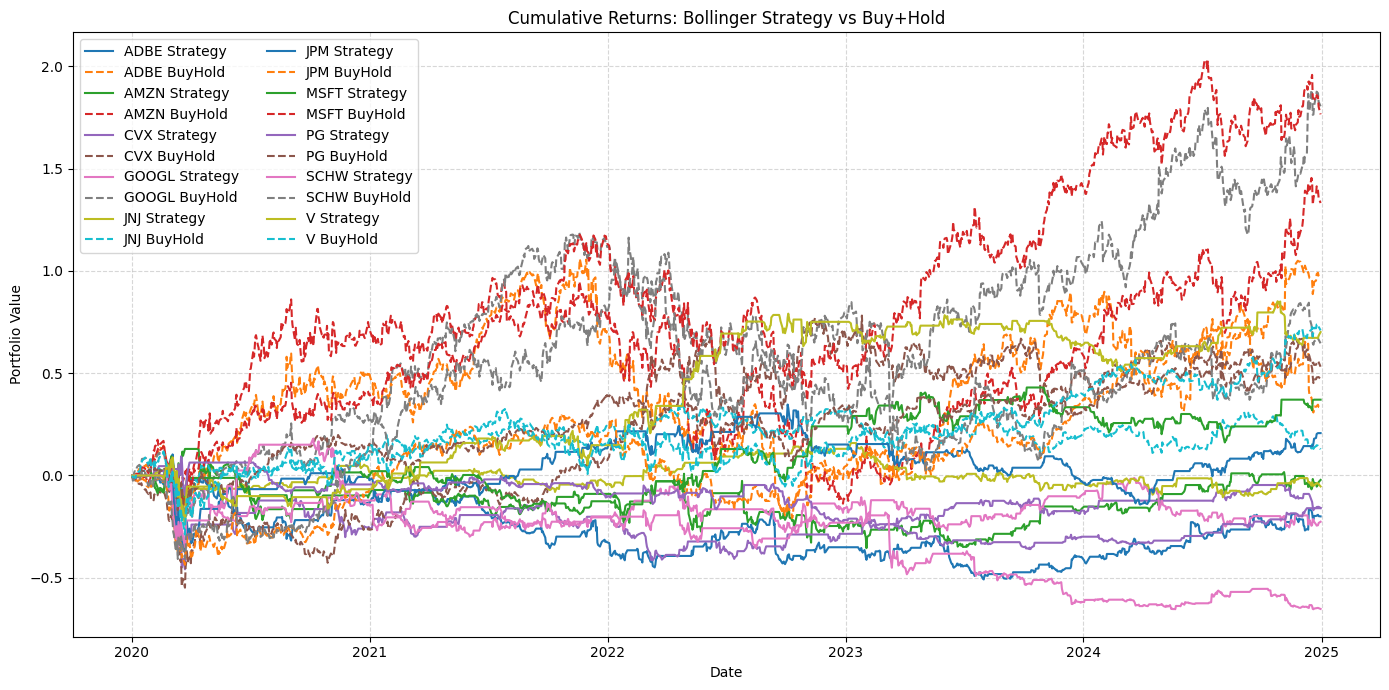

In [182]:
plt.figure(figsize=(14, 7))
for ticker in df.columns:
    plt.plot(cumulative_strategy.index, cumulative_strategy[ticker], label=f"{ticker} Strategy")
    plt.plot(cumulative_buyhold.index, cumulative_buyhold[ticker], '--', label=f"{ticker} BuyHold")
plt.title("Cumulative Returns: Bollinger Strategy vs Buy+Hold")
plt.xlabel("Date")
plt.ylabel("Portfolio Value")
plt.legend(loc="upper left", ncol=2, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 4. Portfolio Management
(1) Visualise the portfolio by plotting the correlation matrix of its simple daily returns.

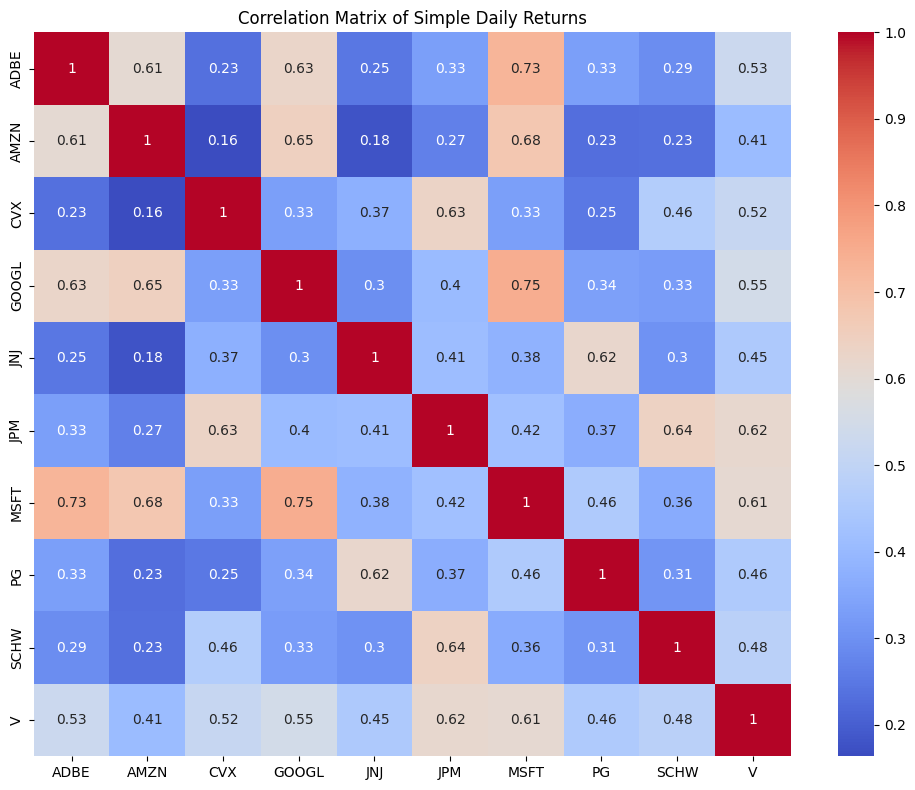

In [183]:
plt.figure(figsize=(10, 8))
sns.heatmap(buyhold_returns_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Simple Daily Returns")
plt.tight_layout()
plt.show()

(2) Create a portfolio of the 10 stocks with equal initial weights.

In [184]:
weights = np.ones(10) / 10 
# Therefore, we assign equal weights (1/10) to each stock in the portfolio. 

(3) Calculate the portfolio returns and cumulative returns.

In [185]:
portfolio_returns = buyhold_returns_df.dot(weights)
portfolio_cumreturns = (1 + portfolio_returns).cumprod() - 1

(4) Calculate the daily standard deviation of portfolio returns as a risk measurement.

In [186]:
portfolio_std = portfolio_returns.std()

### 5. Portfolio Optimisation
(1) Implement simple portfolio optimisation by maximising the Sharpe Ratio.

In [187]:
RFR = 0.0441
TRADING_DAYS = 252

def negative_sharpe(weights):
    # Calculate annualized portfolio return
    p_returns = np.dot(buyhold_returns_df.mean(), weights) * TRADING_DAYS
    # Calculate annualized portfolio volatility
    cov = buyhold_returns_df.cov() * TRADING_DAYS
    p_volatility = np.sqrt(np.dot(weights, np.dot(cov, weights)))
    sharpe_ratio = (p_returns - RFR) / p_volatility
    return -sharpe_ratio  # Return the negative Sharpe ratio for minimization

# Constraints
cons = {"type": "eq", "fun": lambda x: sum(x) - 1}

# Bounds
bounds = tuple((0, 1) for x in range(10))

# Weights
init_weights = np.ones(10) / 10

# Optimisation
optimal = minimize(negative_sharpe, init_weights, bounds=bounds, constraints=cons)
sharpe_weights = optimal.x

print(f"Optimised Sharpe Ratio: {optimal.fun:.4f}")

print("Optimised Portfolio Weights:")
for ticker, weight in zip(df.columns, sharpe_weights):
    print(f"{ticker}: {weight:.4f}")

Optimised Sharpe Ratio: -0.7317
Optimised Portfolio Weights:
ADBE: 0.0000
AMZN: 0.0555
CVX: 0.0000
GOOGL: 0.3505
JNJ: 0.0000
JPM: 0.1779
MSFT: 0.4155
PG: 0.0000
SCHW: 0.0005
V: 0.0000


(2) Implement an AI-generated portfolio optimisation

According to the results AI generated, I chose Minimum Variance Portfolio

Objective: Minimize portfolio variance.

Metric: Portfolio variance (risk).

Use case: Risk-averse investors.

Constraints: Sum of weights = 1, weights ≥ 0 (long-only).



In [188]:
def portfolio_variance(weights):
    # Calculate annualized covariance matrix
    cov = buyhold_returns_df.cov() * TRADING_DAYS
    # Calculate portfolio variance (scalar)
    variance = np.dot(weights, np.dot(cov, weights))
    return variance

# Constraints
cons = {"type": "eq", "fun": lambda x: np.sum(x) - 1} 

# Bounds
bounds = tuple((0, 1) for x in range(10))

# Weights
init_weights = np.ones(10) / 10

# Optimisation
optimal = minimize(portfolio_variance, init_weights, bounds=bounds, constraints=cons)
variance_weights = optimal.x

print(f"Optimised Portfolio Variance: {optimal.fun:.4f}")

print("Optimised Portfolio Weights for Minimum Variance:")
for ticker, weight in zip(df.columns, variance_weights):
    print(f"{ticker}: {weight:.4f}")

Optimised Portfolio Variance: 0.0299
Optimised Portfolio Weights for Minimum Variance:
ADBE: 0.0000
AMZN: 0.1180
CVX: 0.0579
GOOGL: 0.0182
JNJ: 0.4621
JPM: 0.0000
MSFT: 0.0000
PG: 0.3220
SCHW: 0.0180
V: 0.0037


(3) Visually (by plotting) compare the:

Cumulative Sharpe Ratio optimised portfolio returns;

Cumulative portfolio returns optimised using the AI-generated approach;

Cumulative initial (equal-weighting) portfolio returns.



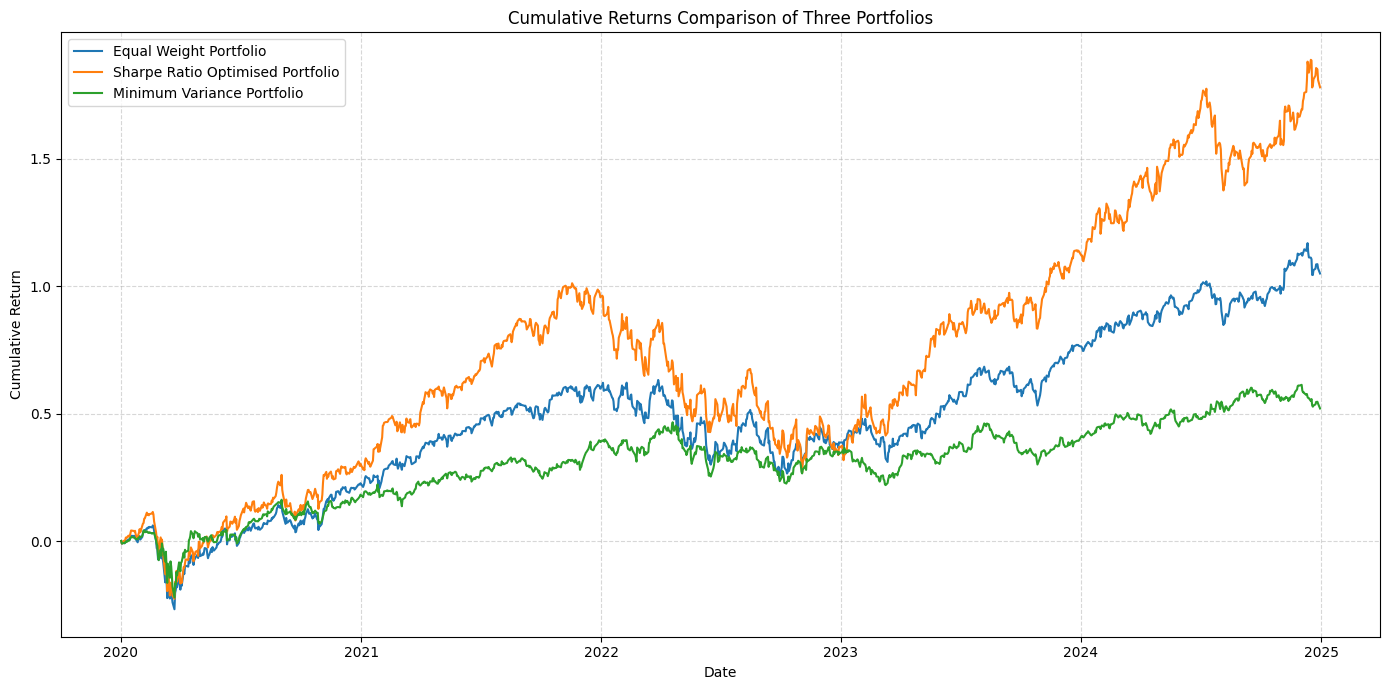

In [189]:
# Cumulative returns for equal weight portfolio
equal_weights = np.ones(10) / 10
equal_returns = buyhold_returns_df.dot(equal_weights)
equal_cumulative = (1 + equal_returns).cumprod() - 1

# Cumulative Sharpe Ratio optimised portfolio returns
sharpe_returns = buyhold_returns_df.dot(sharpe_weights)
sharpe_cumulative = (1 + sharpe_returns).cumprod() - 1

# Cumulative portfolio returns optimised using AI-generated approach (Minimum portfolio variance)
minvar_returns = buyhold_returns_df.dot(variance_weights)
minvar_cumulative = (1 + minvar_returns).cumprod() - 1

# Visualisation
plt.figure(figsize=(14, 7))
plt.plot(equal_cumulative, label="Equal Weight Portfolio")
plt.plot(sharpe_cumulative, label="Sharpe Ratio Optimised Portfolio")
plt.plot(minvar_cumulative, label="Minimum Variance Portfolio")
plt.title("Cumulative Returns Comparison of Three Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()